In [3]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

### EXPLORATORIO GÉNER0

Lectura del dataset limpio, generado en notebook 'DATA CLEANSING - GÉNERO'. (Argentina)

In [4]:
colnames = ['device_idx','label','feature_type','feature_detail']
df_analisis_exp = pd.read_csv('df_demografico_ar.csv', usecols=colnames)
df_analisis_exp.head(3)

,device_idx,label,feature_type,feature_detail
0,392.0,2.0,db,XiaoMi
1,392.0,2.0,url,bumeran.com.ar/empleos-busqueda-legales.html
2,392.0,2.0,bf,Chrome


Tipos de Features:   

feature type **dom** (dominio)   
feature type **url** (url)   
feature type **df** (Modelo Dispositivo)   
feature type **ov** (versión del sistema operativo)   
feature type **bf** (browser)   
feature type **db** (Marca Dispositivo)   
feature type **of** (sistema operativo)   
feature type **oa** ()   

### Distribuciones de dispositivos (count unique) en cada uno de los tipos de atributos

In [13]:
print('Group by type of feature - Argentina')
tmp_groupby_ft = df_analisis_exp.groupby(['feature_type']).nunique().sort_values('device_idx', ascending=False)
tmp_groupby_ft = tmp_groupby_ft[['device_idx']]
tmp_groupby_ft = tmp_groupby_ft.rename(columns={'device_idx':'# Devices Unique'})
tmp_groupby_ft.reset_index().rename(columns={'feature_type':'Feature Type'})

Group by type of feature - Argentina


,Feature Type,# Devices Unique
0,dom,99517
1,url,98537
2,of,88746
3,bf,88633
4,oa,85669
5,ov,85288
6,db,29626
7,df,20757


#### Distribución de devices en Dominios

               feature_detail  # Devices Unique
211            bumeran.com.ar             30371
208        buenosaires.gob.ar             26843
1581          zonajobs.com.ar             25646
1582          zonaprop.com.ar             20501
358              cronista.com             16762
...                       ...               ...
978                 mtbpro.es                 9
902   mardelplata.italiani.it                 9
666            globaltimes.cn                 8
843    ledesmapropiedades.com                 8
155            bambuguazu.com                 8

[1587 rows x 2 columns]


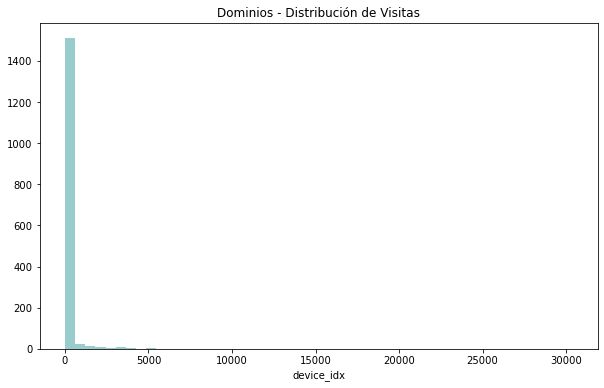

In [39]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='dom')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}).sort_values('# Devices Unique',\
                                                                                                  ascending=False))
plt.figure(figsize=(10,6)) 
plt.title("Dominios - Distribución de Visitas")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Se puede observar que los dispositivos (usuarios) se concentran en unos pocos dominios. Es decir, son pocos dominios los que son más visitados por usuarios de este caso de estudio.*

#### Distribución de dominios en Dispositivos

       device_idx  # Domains Unique
0         37063.0                40
3         24438.0                36
4         17519.0                36
1         72232.0                36
2         72596.0                36
...           ...               ...
84372     15402.0                 1
84371     15398.0                 1
84370     15395.0                 1
84369     93616.0                 1
99516     51001.0                 1

[99517 rows x 2 columns]


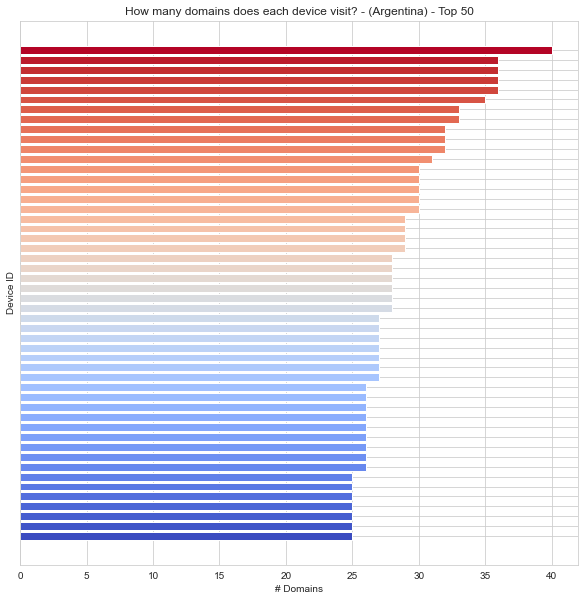

In [41]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='dom')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False)
print(grouped_idx_dom.reset_index().rename(columns={'feature_detail':'# Domains Unique'}).sort_values('# Domains Unique',\
                                                                                                      ascending=False))
grouped_idx_dom = grouped_dom_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False).head(50)
grouped_idx_dom = grouped_idx_dom.sort_values('feature_detail', ascending=True)

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(10, 10) 
sns.set_style("whitegrid")

height = grouped_idx_dom['feature_detail'].to_list()
bars = grouped_idx_dom.index
y_pos = np.arange(len(bars))

plt.title("How many domains does each device visit? - (Argentina) - Top 50")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Domains')
plt.ylabel('Device ID')

locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

ax1 = plt.axes()
plt.setp(ax1.get_yticklabels(), visible=False)

# Show graphic
plt.show()

*Se puede observar que hay dispositivos que visitan entre 30 y 40 dominios distintos. Los demás dispositivs (usuarios) visitan menos de 30 dominios distintos, en este dataset de Argentina, Enero 2021*

#### Distribución de devices en Urls

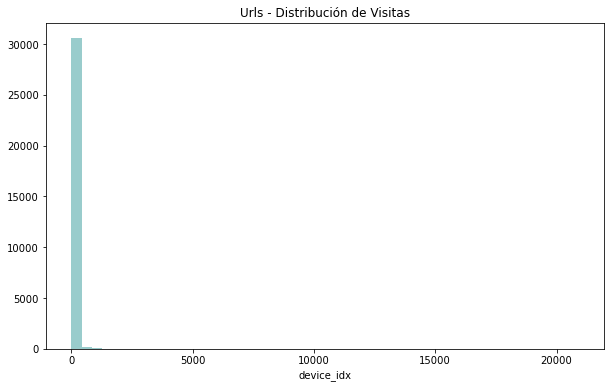

In [20]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='url')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title("Urls - Distribución de Visitas")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Al igual que en el caso de dominios, se observa que los dispositivos (usuarios) se concentran en unas pocas urls. Es decir, son pocas las urls más visitadas por usuarios de este caso de estudio.*

       device_idx  # Urls Unique
0         51252.0            806
1         22186.0            761
2         91690.0            654
3         46492.0            623
4         64630.0            606
...           ...            ...
95733     64605.0              1
95734     42412.0              1
95735     47522.0              1
95736     57401.0              1
98536     80212.0              1

[98537 rows x 2 columns]


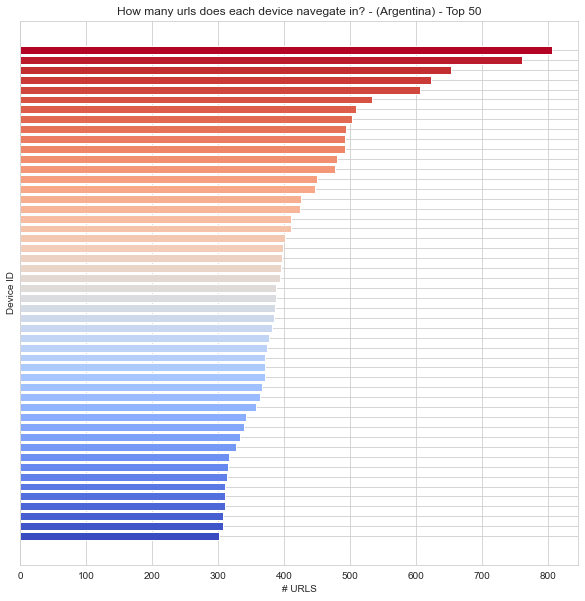

In [53]:
grouped_url_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='url')]
grouped_url_ar = grouped_url_ar[['device_idx','feature_detail']]
grouped_idx_url = grouped_url_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False)
print(grouped_idx_url.reset_index().rename(columns={'feature_detail':'# Urls Unique'}).sort_values('# Urls Unique',\
                                                                                                      ascending=False))
grouped_idx_url = grouped_url_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False).head(50)
grouped_idx_url = grouped_idx_url.sort_values('feature_detail', ascending=True)

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(10, 10) 
sns.set_style("whitegrid")

height = grouped_idx_url['feature_detail'].to_list()
bars = grouped_idx_url.index
y_pos = np.arange(len(bars))

plt.title("How many urls does each device navegate in? - (Argentina) - Top 50")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# URLS')
plt.ylabel('Device ID')

locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

ax1 = plt.axes()
plt.setp(ax1.get_yticklabels(), visible=False)

# Show graphic
plt.show()

*Se puede observar que hay dispositivos que visitan entre 600 y 800 urls distintas. Los demás dispositivs (usuarios) visitan menos de 600 urls distintos, en este dataset de Argentina, Enero 2021.*

#### Distribución de devices en Sistema Operativo

  feature_detail  # Devices Unique
0        Android             37748
1          Linux               652
2       Mac OS X              2462
3        Windows             46910
4            iOS              1013


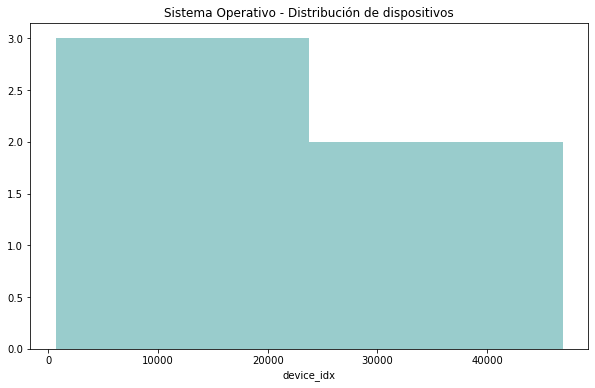

In [29]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='of')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title("Sistema Operativo - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Los dispositivos de la muestra poseen en su mayoría sistema operativo Android o Windows. Se observa con claridad que son solo 2 los sistemas operativos relevantes.*

       device_idx  # OS Unique
0         49749.0            2
20        45478.0            2
22        39533.0            2
23        71267.0            2
24        71264.0            2
...           ...          ...
29605    101977.0            1
29604    101978.0            1
29603    101979.0            1
29602    101980.0            1
88745    101989.0            1

[88746 rows x 2 columns]


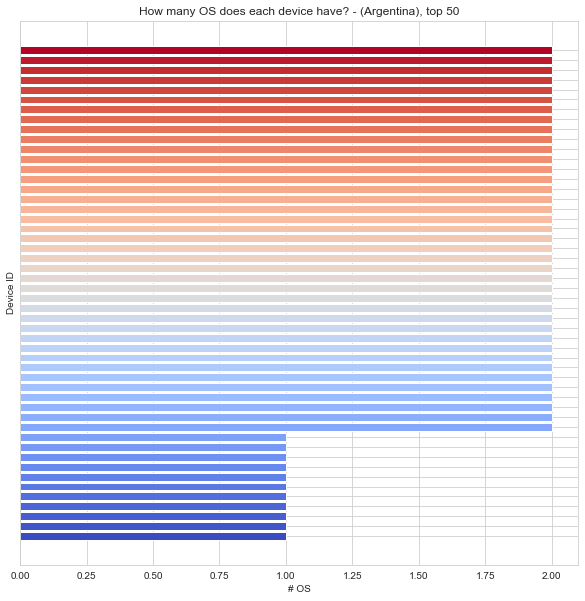

In [49]:
grouped_of_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='of')]
grouped_of_ar = grouped_of_ar[['device_idx','feature_detail']]
grouped_idx_of = grouped_of_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False)
print(grouped_idx_of.reset_index().rename(columns={'feature_detail':'# OS Unique'}).sort_values('# OS Unique',\
                                                                                                      ascending=False))
grouped_idx_of = grouped_of_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False).head(50)
grouped_idx_of = grouped_idx_of.sort_values('feature_detail', ascending=True)

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(10, 10) 
sns.set_style("whitegrid")

height = grouped_idx_of['feature_detail'].to_list()
bars = grouped_idx_of.index
y_pos = np.arange(len(bars))

plt.title("How many OS does each device have? - (Argentina), top 50")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# OS')
plt.ylabel('Device ID')

locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

ax1 = plt.axes()
plt.setp(ax1.get_yticklabels(), visible=False)

# Show graphic
plt.show()

In [51]:
grouped_of_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='of')]
grouped_of_ar = grouped_of_ar[['device_idx','feature_detail']]
grouped_idx_of = grouped_of_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False)
grouped_idx_of_2 = grouped_idx_of[grouped_idx_of['feature_detail']>1].reset_index()
print(grouped_idx_of_2.shape)
grouped_idx_of_2.rename(columns={'feature_detail':'# OS Unique'}).sort_values('# OS Unique',\
                                                                                                      ascending=False).head()

(39, 2)


,device_idx,# OS Unique
0,49749.0,2
29,691.0,2
22,39533.0,2
23,71267.0,2
24,71264.0,2


*Hay 39 dispositivos en el dataset con más de 1 sistema operativo. ESTO NO ES COHERENTE.   
Posibilidad: Eliminar a estos usuarios o ir a la row data y quedarme con los informados en el día más lejano del mes.*

#### Distribución de devices en Navegador

  feature_detail  # Devices Unique
0  Brand_browser              5695
1         Chrome             69985
2           Edge               648
3        Firefox              4646
4         Google               245
5             IE               284
6         Safari               773
7      SocialApp              6359


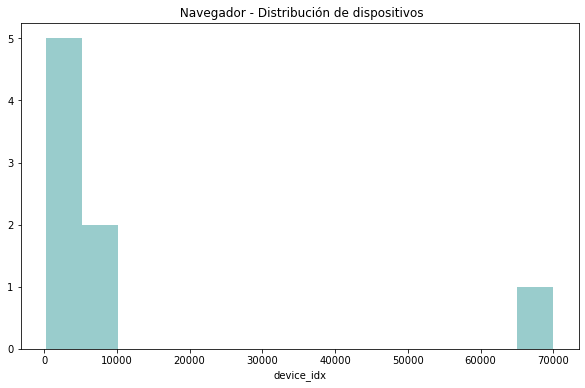

In [25]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='bf')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title(" Navegador - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Se observa con claridad que son solo 3 los navegadores relevantes. Es decir, los dispositivos son utilizados a través 3 principales navegadores, siendo uno solo el que se destaca en la mayoría de los dispositivos.*

       device_idx  # Browser Unique
0         71382.0                 2
1         83013.0                 2
88631     34174.0                 1
59084        16.0                 1
59092         7.0                 1
...           ...               ...
29543    101987.0                 1
29542    101988.0                 1
29541    101969.0                 1
29540    101968.0                 1
88632    101989.0                 1

[88633 rows x 2 columns]


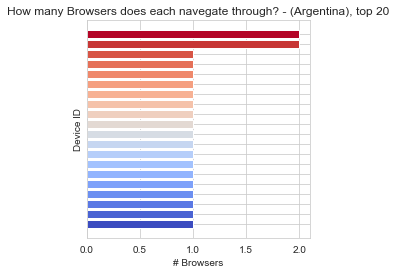

In [52]:
grouped_bf_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='bf')]
grouped_bf_ar = grouped_bf_ar[['device_idx','feature_detail']]
grouped_idx_bf = grouped_bf_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False)
print(grouped_idx_bf.reset_index().rename(columns={'feature_detail':'# Browser Unique'}).sort_values('# Browser Unique',\
                                                                                                      ascending=False))
grouped_idx_bf = grouped_bf_ar.groupby(["device_idx"]).nunique().sort_values('feature_detail', ascending=False).head(20)
grouped_idx_bf = grouped_idx_bf.sort_values('feature_detail', ascending=True)

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(4, 4) 
sns.set_style("whitegrid")

height = grouped_idx_bf['feature_detail'].to_list()
bars = grouped_idx_bf.index
y_pos = np.arange(len(bars))

plt.title("How many Browsers does each navegate through? - (Argentina), top 20")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Browsers')
plt.ylabel('Device ID')

locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

ax1 = plt.axes()
plt.setp(ax1.get_yticklabels(), visible=False)

# Show graphic
plt.show()

*La gran mayoría de los dispositivos navegan a tranves de un único navegador. Sólo 2 lo hacen con 2 navegadores distintos.*

#### Distribución de devices en Versión de Sistema Operativo

   feature_detail  # Devices Unique
0      Android 10             14704
1       Android 4               598
2       Android 5              1227
3       Android 6              3252
4       Android 7              3157
5       Android 8              7371
6       Android 9              7441
7      Windows 10             33727
8       Windows 7             10071
9       Windows 8              2261
10     Windows XP               755
11         iOS 13               293
12         iOS 14               491


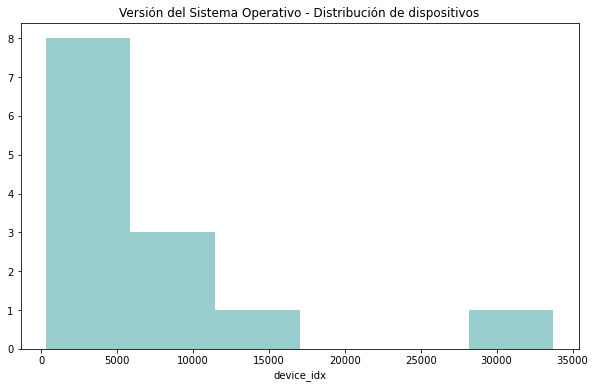

In [26]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='ov')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title("Versión del Sistema Operativo - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Se observa con claridad que una versión del sistema operativo concentra a la mayoría de la población. Luego, con menos cantidad, otras 3 versiones concentran a la población.*

#### Distribución de dispositivos en Marca

  feature_detail  # Devices Unique
0          Apple              3473
1         Huawei              1240
2             LG              1007
3       Motorola               568
4        Samsung             21363
5         XiaoMi              1975


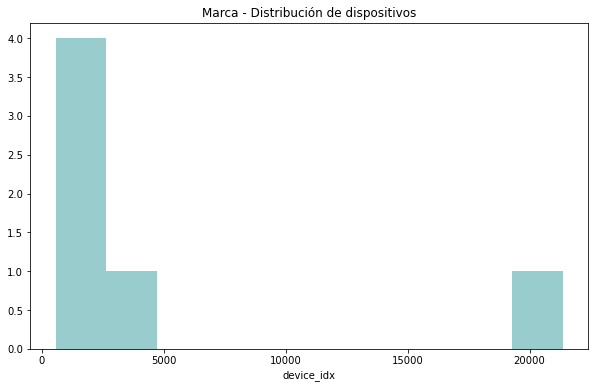

In [27]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='db')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title("Marca - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Se observa con claridad que una marca concentra a la mayoría de la población. Luego, con menos cantidad, otras 2 marcas concentran a la población.*

#### Distribución de dispositivos en Modelo

         feature_detail  # Devices Unique
0               LG-M250               217
1                   Mac               267
2                Moto C               250
3             Moto E (4               210
4             Moto G (5               386
5            Moto G (5S               331
6      Samsung SM-A015M               320
7      Samsung SM-A105M              1157
8      Samsung SM-A107M               596
9      Samsung SM-A115M               220
10     Samsung SM-A205G               812
11     Samsung SM-A207M               402
12     Samsung SM-A217M               295
13     Samsung SM-A305G               662
14     Samsung SM-A307G               582
15     Samsung SM-A315G               431
16     Samsung SM-A505G               739
17     Samsung SM-A515F               673
18     Samsung SM-A520F               199
19    Samsung SM-A705MN               256
20     Samsung SM-A715F               226
21     Samsung SM-G532M              1432
22     Samsung SM-G570M           

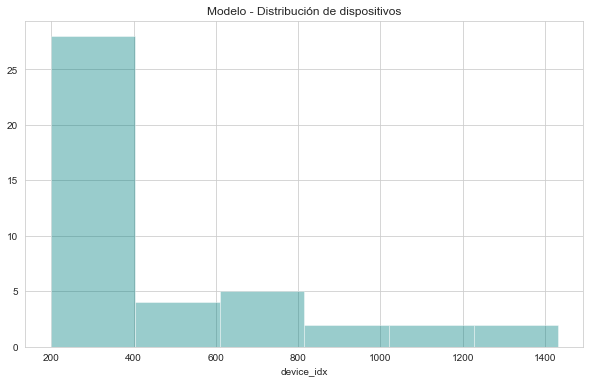

In [54]:
grouped_dom_ar = df_analisis_exp[(df_analisis_exp["feature_type"]=='df')]
grouped_dom_ar = grouped_dom_ar[['device_idx','feature_detail']]
grouped_idx_dom = grouped_dom_ar.groupby(["feature_detail"]).nunique()
print(grouped_idx_dom.reset_index().rename(columns={'device_idx':'# Devices Unique'}))
plt.figure(figsize=(10,6)) 
plt.title("Modelo - Distribución de dispositivos")
# we can pass keyword arguments for each individual component of the plot
#We can pass in the variable we want to visualize along with keyword arguments for each of the individual
#components of the plot.
sns.distplot(grouped_idx_dom.reset_index().device_idx, kde=False, hist_kws={'color': 'Teal'});

*Se observa que un modelo de dispositivo concentra a la mayoría de la población. Luego, con menos cantidad, otros modelos concentran a la población de manera más uniforme.*

### Distribución Género

In [8]:
print('Distribución Género para Argentina')
data_hombres = df_analisis_exp[df_analisis_exp['label']==2]
data_hombres['name_label'] = 'Male'
data_mujeres = df_analisis_exp[df_analisis_exp['label']==3]
data_mujeres['name_label'] = 'Female'
data_hombres = data_hombres[['name_label','device_idx']]
data_mujeres = data_mujeres[['name_label','device_idx']]
data = pd.concat([data_hombres, data_mujeres], axis=0)
data = data.groupby(['name_label']).nunique().sort_values('device_idx', ascending=False)
data

Distribución Género para Argentina


,device_idx
name_label,
Female,52897
Male,46847


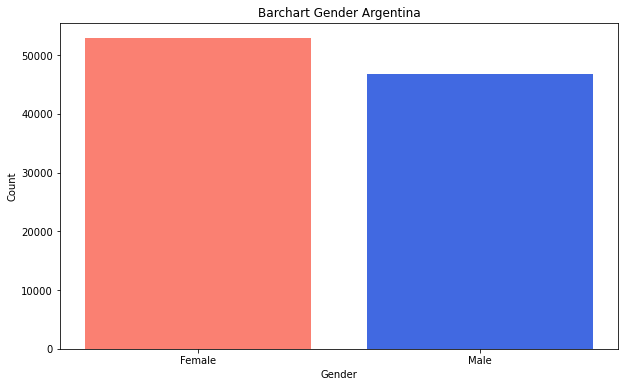

In [9]:
fig = plt.gcf()
fig.set_size_inches(10, 6) 

my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

#Grafico de barras
height = data['device_idx'].to_list()
bars = data.index #('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color=['salmon','royalblue']) #color = (0.3,0.1,0.4,0.6), color=my_cmap(rescale(y_pos)
 
# Add title and axis names
plt.title('Barchart Gender Argentina')
plt.xlabel('Gender')
plt.ylabel('Count')
 
# # Limits for the Y axis
# plt.ylim(0,60)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

Text(0.5, 1.0, 'Distribución de Género')

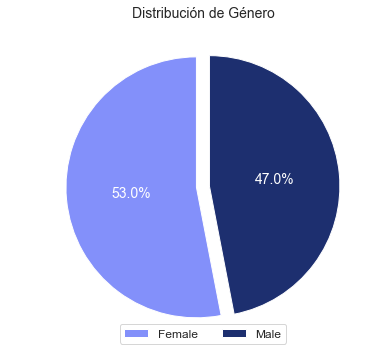

In [149]:
#Using matplotlib piechart
pie, ax = plt.subplots(figsize=[8,6])
colors = ["#8390FA","#1D2F6F"]
plt.pie(x=data['device_idx'], autopct="%.1f%%", explode=[0.05]*2, labels=data.index, pctdistance=0.5, colors=colors,\
        textprops={'color':"w",'fontsize': 14},startangle=90)
plt.legend(['Female','Male'], loc='lower center', ncol = 2, fontsize=12)
plt.title("Distribución de Género", fontsize=14)

*La distribución de género en la población está balanceada, ya que un 53% es mujer y el restante 47% está compuesto por género masculino.*

#### FEATURE TYPE

###### dom: DOMAINS

In [16]:
domains = df_analisis_exp[df_analisis_exp['feature_type']=='dom']
domains = domains.sort_values('device_idx', ascending=False)
domains1 = domains.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=False)
domains1 = domains1[['device_idx']]
domains1 = domains1.rename(columns={'device_idx':'# Devices Unique'})
domains1.reset_index().rename(columns={'feature_detail':'Feature Detail'})

,Feature Detail,# Devices Unique
0,bumeran.com.ar,30371
1,buenosaires.gob.ar,26843
2,zonajobs.com.ar,25646
3,zonaprop.com.ar,20501
4,cronista.com,16762
...,...,...
1582,mtbpro.es,9
1583,mardelplata.italiani.it,9
1584,globaltimes.cn,8
1585,ledesmapropiedades.com,8


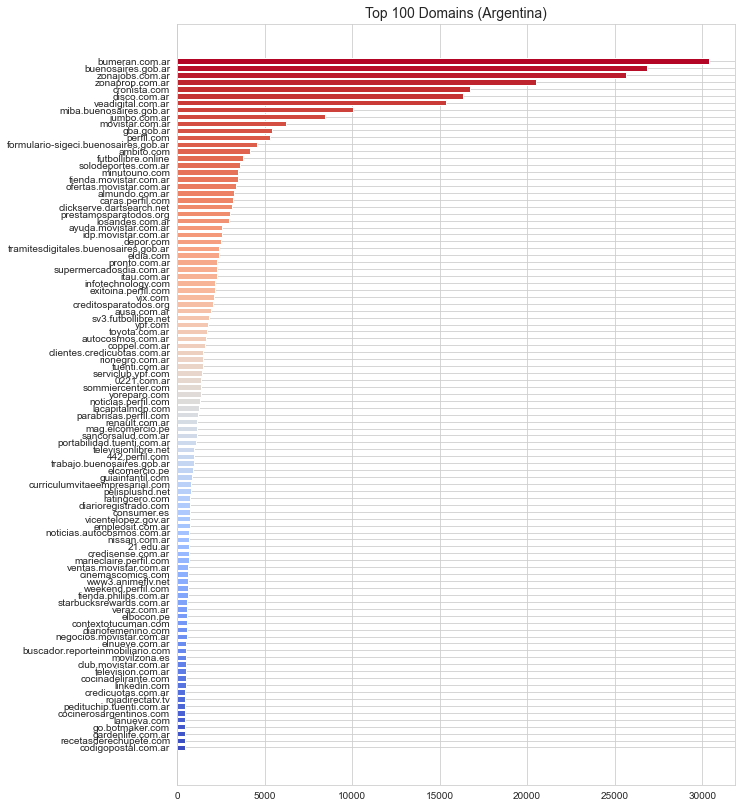

In [11]:
df_features_dom = domains.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=False)
df_features_dom = df_features_dom.head(100).sort_values('device_idx', ascending=True)
df_features_dom = df_features_dom[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(10, 14) 
sns.set_style("whitegrid")

height = df_features_dom['device_idx'].to_list()
bars = df_features_dom.index
y_pos = np.arange(len(bars))

plt.title("Top 100 Domains (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

*Se observa que los dominios más populares son "bumeran.com.ar", "buenosaires.gob.ar", "zonajobs.com.ar" y "zonaprop.com.ar". Se puede inferir entonces que la mayoría de los usuarios pueden estar interesados páginas de empleo. Seguido por sitios de noticias.*

In [10]:
dom_labels = df_analisis_exp[df_analisis_exp['feature_type']=='dom']
dom_labels = dom_labels[['device_idx','feature_detail','label']]
dom_labels_gender = dom_labels[(dom_labels['label']==2) | (dom_labels['label']==3)]
dom_labels_gender = dom_labels_gender.groupby(['label','feature_detail']).nunique().sort_values('device_idx', ascending=False)#.head(100)
dom_labels_gender2 = dom_labels_gender.reset_index()
dom_labels_gender2 = dom_labels_gender2.pivot(index='feature_detail', columns='label', values='device_idx')
dom_labels_gender2 = dom_labels_gender2.sort_values(3.0, ascending=False)
dom_labels_gender2.rename(columns={2.0:'Male', 3.0:'Female'}).head()

label,Male,Female
feature_detail,,
bumeran.com.ar,14029.0,16342.0
zonajobs.com.ar,11596.0,14050.0
buenosaires.gob.ar,14119.0,12724.0
zonaprop.com.ar,8661.0,11840.0
disco.com.ar,6419.0,9889.0


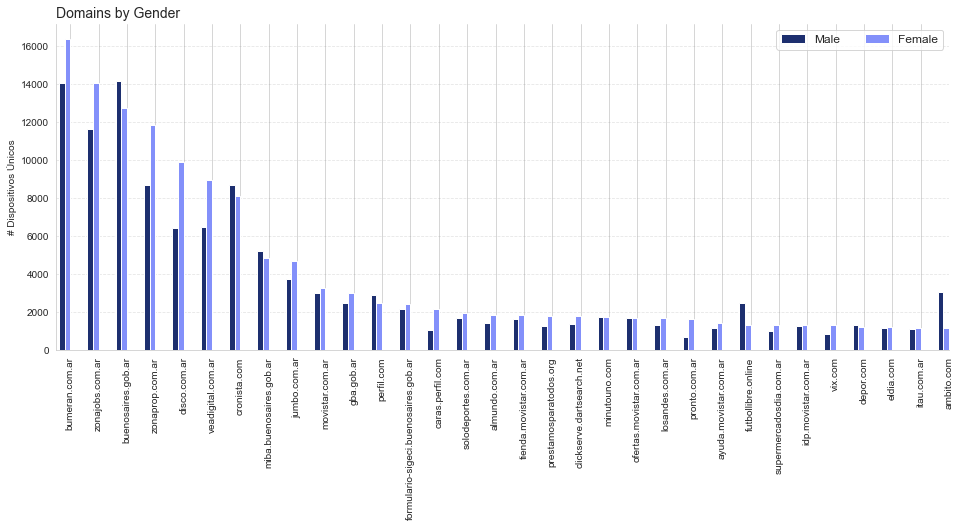

In [15]:
df_grouped = dom_labels_gender2.copy()
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_grouped.index))
# plot bars
plt.bar(x - 0.3, df_grouped[2.0], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped[3.0], width = 0.2, color = '#8390FA')
# plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
# plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('# Dispositivos Únicos')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Domains by Gender', loc ='left', fontsize=14)
plt.legend(['Male', 'Female'], loc='upper right', ncol = 4, fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

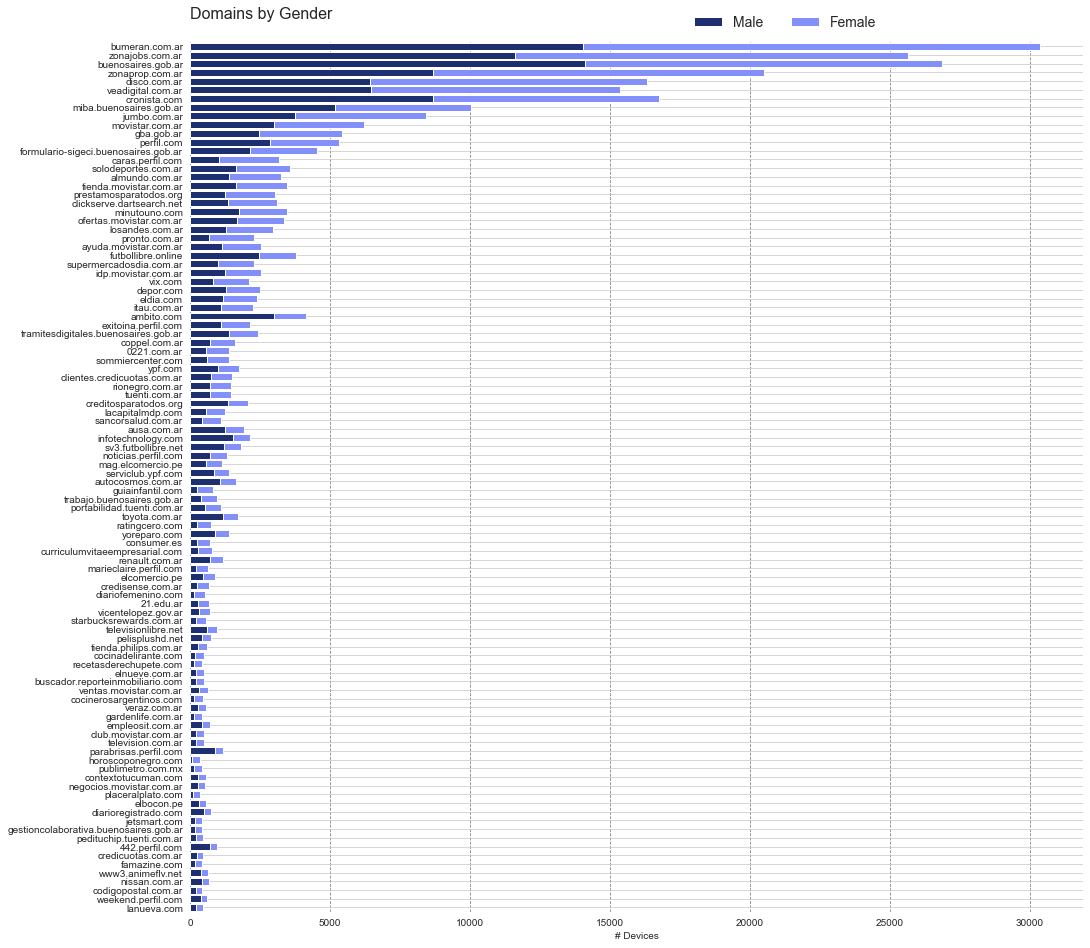

In [16]:
df_grouped = dom_labels_gender2.copy()
df_grouped = df_grouped.head(100)
df_grouped = df_grouped.sort_values(3.0, ascending=True) 
fields = [2.0, 3.0]
colors = ['#1D2F6F', '#8390FA'] #, '#6EAF46', '#FAC748'
labels = ['Male','Female']
# figure and axis
fig, ax = plt.subplots(1, figsize=(16, 16))

# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Domains by Gender\n', loc='left', fontsize=16)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, fontsize=14)
plt.xlabel('# Devices', fontsize=10)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

*Este gráfico deja observar que las cantidades de dispositivos asignados como femeninos y masculinos visitan de forma balanceada a los dominios del caso de estudio.   
Algunos casos de desbalance son los sitios "futbollibre.com" o "perfil.com" donde es el géenro masculino el que más los visita.   
Por el lado femenino, puede observarse, por ejemplo, que el sitio "caras.eprfil.com" es mayormente visitado por mujeres.*

##### WORCLOUDS DE DOMINIOS

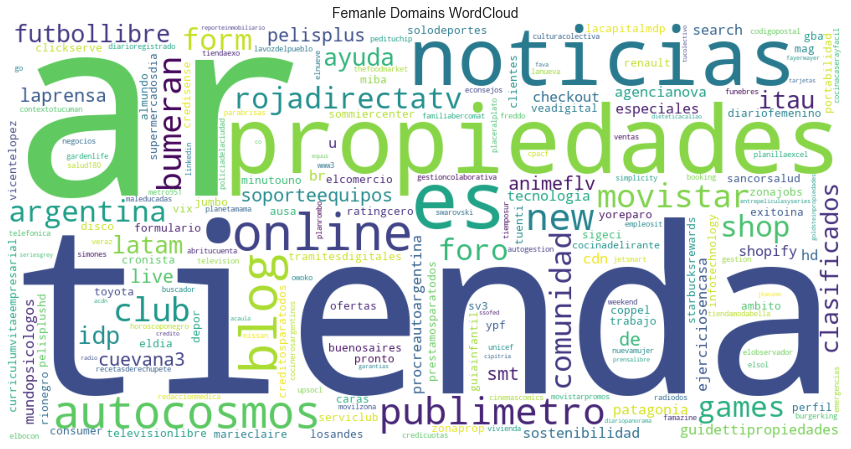

In [68]:
dom_labels_gender_2 = dom_labels_gender.reset_index()
dom_labels_gender_2['words'] = dom_labels_gender_2['feature_detail'].str.split('.',expand=True)[0]

#WORDCLOUD GENERO FEMENINO
words_fem = dom_labels_gender_2[dom_labels_gender_2['label']==3]
my_list = words_fem['words'].to_list()
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Femanle Domains WordCloud", fontsize=14)
plt.show()

*El género femenino tiende a visitar mucho más a sitios de tienda, propiedades, noticias, autocosmos, entre otros dominios.*

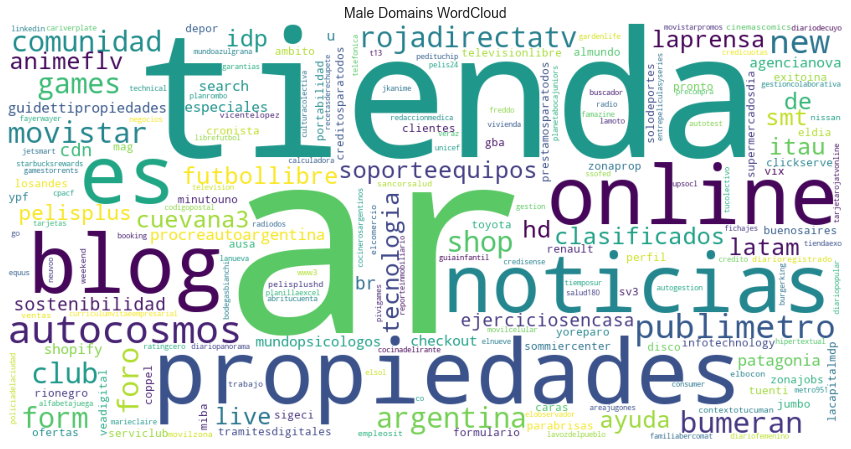

In [69]:
#WORDCLOUD GENERO MASCULINO
words_male = dom_labels_gender_2[dom_labels_gender_2['label']==2]
my_list = words_male['words'].to_list()
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Male Domains WordCloud", fontsize=14)
plt.show()

*El género masculino, al igual que el femenino, tiende a visitar mucho a sitios de tienda, propiedades, noticias, entre otros dominios.   
En este caso se destaca "blog" como parte de un dominio que no están popular entre mujeres.*

##### of: SISTEMA OPERATIVO

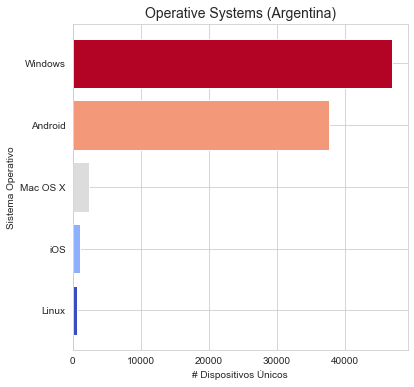

In [18]:
of = df_analisis_exp[df_analisis_exp['feature_type']=='of']
of = of.sort_values('device_idx', ascending=False)
df_features_of = of.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True)
df_features_of = df_features_of[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(6, 6) 
sns.set_style("whitegrid")

height = df_features_of['device_idx'].to_list()
bars = df_features_of.index
y_pos = np.arange(len(bars))

plt.title("Operative Systems (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Sistema Operativo')
 
# Show graphic
plt.show()

*Aquí se confirma que los 2 sistemas oerativos mas populares dentro de la población son Windows y Android.*

Text(0.5, 1.05, 'Gender - Operative System')

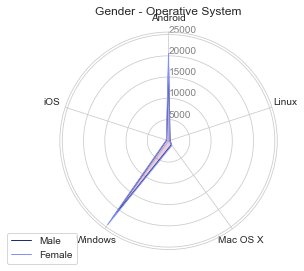

In [21]:
#Grafico telaraña con genero en los feautres de sistema operativo
df_so = df_analisis_exp[df_analisis_exp['feature_type']=='of']
df_so = df_so[['device_idx','feature_detail','label']]
#gender
df_so_gender = df_so[(df_so['label']==2)|(df_so['label']==3)]
df_so_gender = df_so_gender.groupby(['label','feature_detail']).nunique()
df_so_gender = df_so_gender.reset_index()
df_so_gender = df_so_gender.pivot(index='label', columns='feature_detail', values='device_idx').reset_index()
df_so_gender

# Set data
df = df_so_gender

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
pi = 3.1416
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(4,4))
plt.title('Female and Male - Operative System',fontsize=14)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
#plt.ylim(0,40)
 
 # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male",color = '#1D2F6F')
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female",color = '#8390FA')
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Gender - Operative System", fontsize=12)

*Tanto hombres como mujres prefieren Windows y Chrome. No se destaca una diferencia relevante por género.*

##### bf: NAVEGADOR

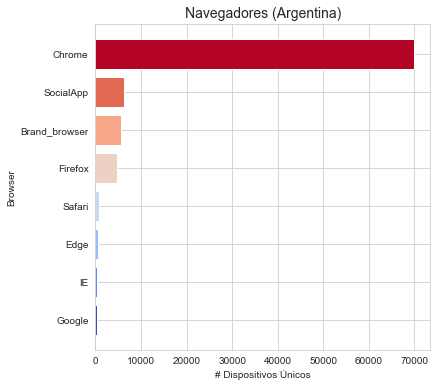

In [57]:
bf = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
bf = bf.sort_values('device_idx', ascending=False)
df_features_bf = bf.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True)
df_features_bf = df_features_bf[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(6, 6) 
sns.set_style("whitegrid")

height = df_features_bf['device_idx'].to_list()
bars = df_features_bf.index
y_pos = np.arange(len(bars))

plt.title("Navegadores (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Browser')

# Show graphic
plt.show()

*Se confirma que Chrome es el navegador más elegido por la población de estudio.*

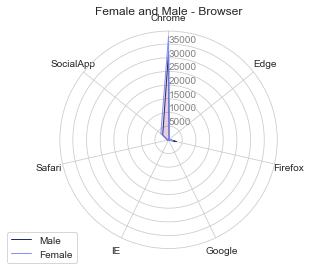

In [28]:
#Grafico telaraña en los feautres de browser
df_bf = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
df_bf = df_bf[['device_idx','feature_detail','label']]
#gender
df_bf_gender = df_bf[(df_bf['label']==2)|(df_bf['label']==3)]
#df_so_gender = df_so_gender[['device_idx','feature_detail']]
df_bf_gender = df_bf_gender.groupby(['label','feature_detail']).nunique()
df_bf_gender = df_bf_gender.reset_index()
df_bf_gender = df_bf_gender.pivot(index='label', columns='feature_detail', values='device_idx').reset_index()
df_bf_gender = df_bf_gender[['label','Chrome','Edge','Firefox','Google','IE','Safari','SocialApp']]

# Set data
df = df_bf_gender

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(4,4))

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
#plt.ylim(0,40)
 
 # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male",color = '#1D2F6F')
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female",color = '#8390FA')
ax.fill(angles, values, 'r', alpha=0.1)

plt.title('Female and Male - Browser',fontsize=12)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

*Chrome es más elegido por mujeres que por hombres.   
También se observa que Firefox es más elegido por hombres que por mujeres.*

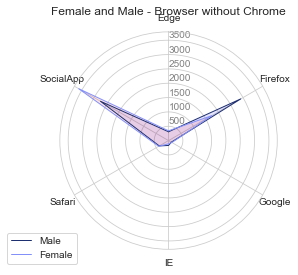

In [30]:
# Set data

df = df_bf_gender[['label','Edge','Firefox','Google','IE','Safari','SocialApp']]

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(4,4))

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
#plt.ylim(0,40)
 
 # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male",color = '#1D2F6F')
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female",color = '#8390FA')
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.title('Female and Male - Browser without Chrome',fontsize=12)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

##### oa

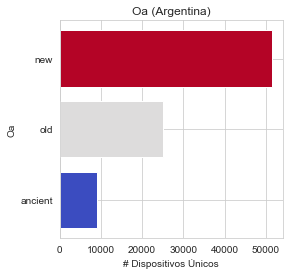

In [38]:
oa = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
oa = oa.sort_values('device_idx', ascending=False)
df_features_oa = oa.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True).head(100)
df_features_oa = df_features_oa[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(4, 4) 
sns.set_style("whitegrid")

height = df_features_oa['device_idx'].to_list()
bars = df_features_oa.index
y_pos = np.arange(len(bars))

plt.title("Oa (Argentina)")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Oa')
    
# Show graphic
plt.show()

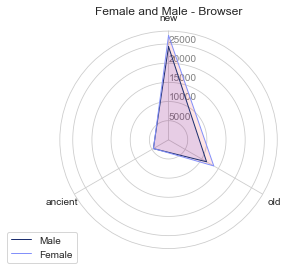

In [39]:
#Grafico telaraña en los feautres de oa
df_oa = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
df_oa = df_oa[['device_idx','feature_detail','label']]
#gender
df_oa_gender = df_oa[(df_oa['label']==2)|(df_oa['label']==3)]
#df_so_gender = df_so_gender[['device_idx','feature_detail']]
df_oa_gender = df_oa_gender.groupby(['label','feature_detail']).nunique()
df_oa_gender = df_oa_gender.reset_index()
df_oa_gender = df_oa_gender.pivot(index='label', columns='feature_detail', values='device_idx').reset_index()
df_oa_gender = df_oa_gender[['label','new','old','ancient']]

# Set data
df = df_oa_gender

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(4,4))

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
#plt.ylim(0,40)
 
 # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male",color = '#1D2F6F')
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('label').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female",color = '#8390FA')
ax.fill(angles, values, 'r', alpha=0.1)

plt.title('Female and Male - Browser',fontsize=12)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

##### ov: OPERATIVE SYSTEM VERSION

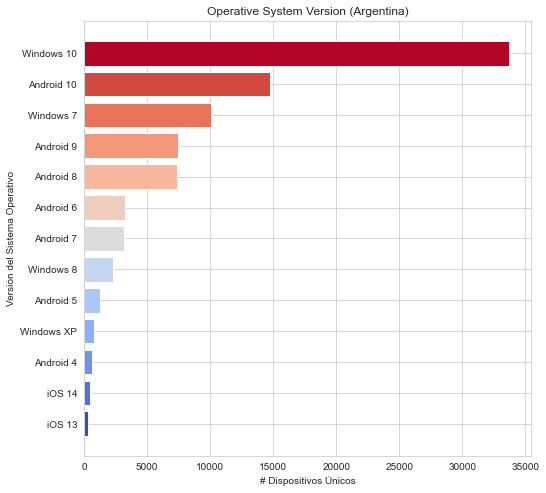

In [41]:
ov = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
ov = ov.sort_values('device_idx', ascending=False)
df_features_ov = ov.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True)
df_features_ov = df_features_ov[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(8, 8) 
sns.set_style("whitegrid")

height = df_features_ov['device_idx'].to_list()
bars = df_features_ov.index
y_pos = np.arange(len(bars))

plt.title("Operative System Version (Argentina)")
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Versión del Sistema Operativo')
 
# Show graphic
plt.show()

*Windows 10 es la versión más popular en la población de estudio. Le sigue Android 10. Y la versión de navegador menos popular es iOS 13, instaurada por IPhone en 2019.   
Se puede inferir que los dispositivos son computadoras con Windows y celulares con Android en su mayoría.*

##### df: MODELO DEL DISPOSITIVO

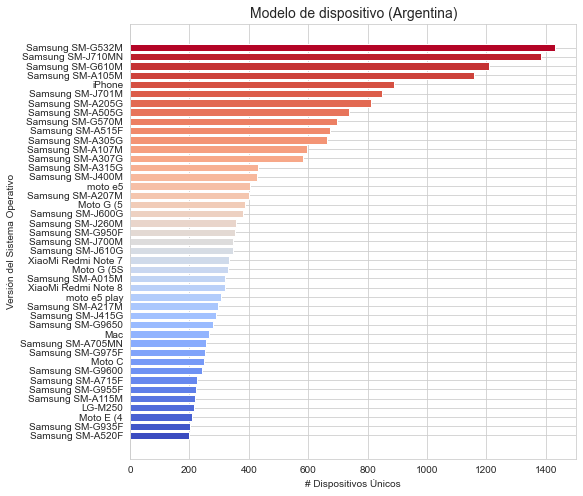

In [47]:
df = df_analisis_exp[df_analisis_exp['feature_type']=='df']
df = df.sort_values('device_idx', ascending=False)

df_features_df = df.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True)
df_features_df = df_features_df[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(8, 8) 
sns.set_style("whitegrid")

height = df_features_df['device_idx'].to_list()
bars = df_features_df.index
y_pos = np.arange(len(bars))

plt.title("Modelo de dispositivo (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Versión del Sistema Operativo')
 
# Show graphic
plt.show()

*Los mmodelos de la marca Samsung son los más populares dentro de la población de estudio.*

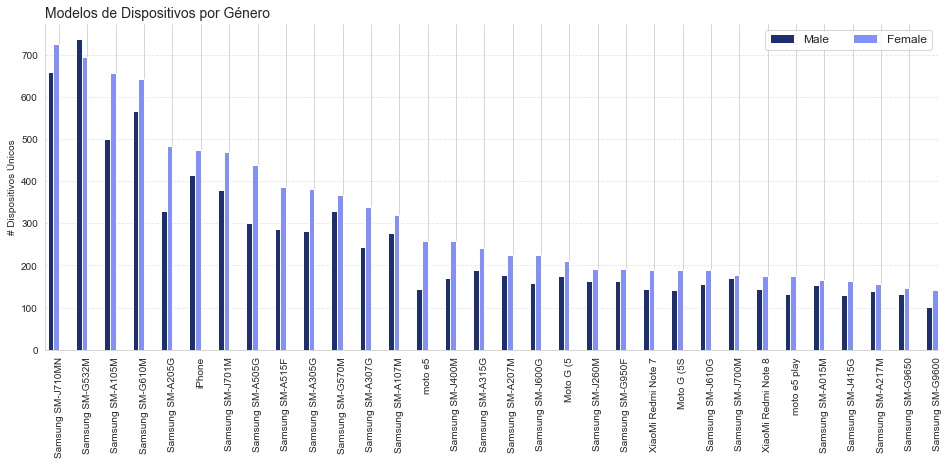

In [48]:
df_labels = df_analisis_exp[df_analisis_exp['feature_type']=='df']
df_labels = df_labels[['device_idx','feature_detail','label']]

df_labels_gender = df_labels[(df_labels['label']==2) | (df_labels['label']==3)]
#agrupo, me quedo con top 100?
df_labels_gender = df_labels_gender.groupby(['label','feature_detail']).nunique().sort_values('device_idx', ascending=False)#.head(100)
df_labels_gender2 = df_labels_gender.reset_index()
df_labels_gender2 = df_labels_gender2.pivot(index='feature_detail', columns='label', values='device_idx')
df_labels_gender2 = df_labels_gender2.sort_values(3.0, ascending=False)

df_grouped = df_labels_gender2.copy()
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_grouped.index))
# plot bars
plt.bar(x - 0.3, df_grouped[2.0], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped[3.0], width = 0.2, color = '#8390FA')
# plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
# plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('# Dispositivos Únicos')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Modelos de Dispositivos por Género', loc ='left', fontsize=14)
plt.legend(['Male', 'Female'], loc='upper right', ncol = 4, fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

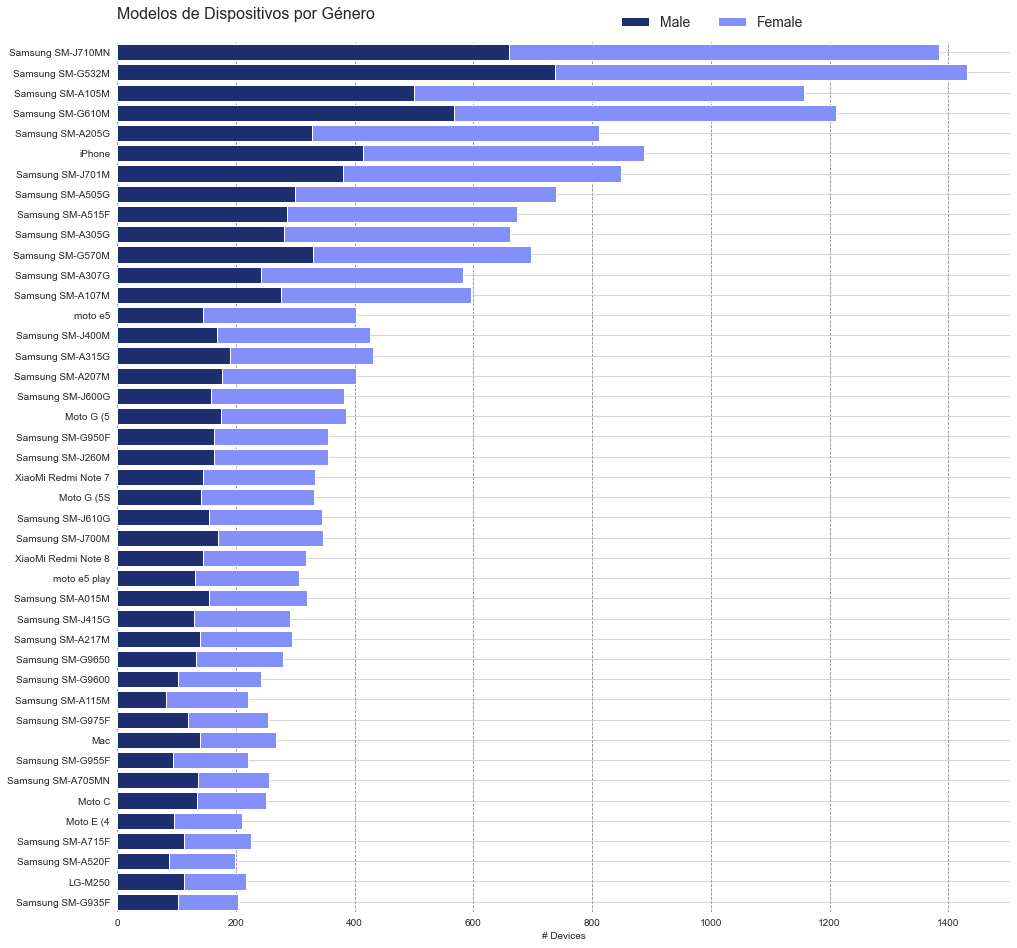

In [50]:
df_grouped = df_labels_gender2.copy()
df_grouped = df_grouped#.head(100)
df_grouped = df_grouped.sort_values(3.0, ascending=True) 
fields = [2.0, 3.0]
colors = ['#1D2F6F', '#8390FA'] #, '#6EAF46', '#FAC748'
labels = ['Male','Female']
# figure and axis
fig, ax = plt.subplots(1, figsize=(16, 16))

# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Modelos de Dispositivos por Género\n', loc='left', fontsize=16)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, fontsize=14)
plt.xlabel('# Devices', fontsize=10)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

*Este gráfico deja observar que las cantidades de dispositivos asignados como femeninos y masculinos tienen modelos de celular en forma balanceada.
Algunos casos de desbalance pertenecen al caso del modelo Sansung SM-G532M, donde se ve que lo poseen más hombres que mujeres.   
Luego puede observarse que en los restantes modelos igualan o sobrepasan a la proporción de hombres.*

##### db: MARCA DEL DISPOSITIVO

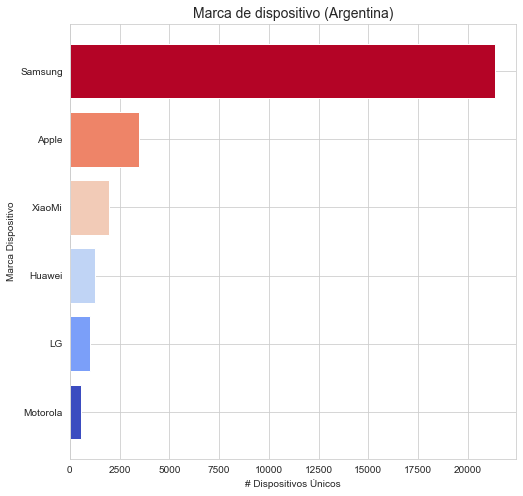

In [53]:
db = df_analisis_exp[df_analisis_exp['feature_type']=='db']
db = db.sort_values('device_idx', ascending=False)

df_features_db = db.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=True)
df_features_db = df_features_db[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(8, 8) 
sns.set_style("whitegrid")

height = df_features_db['device_idx'].to_list()
bars = df_features_db.index
y_pos = np.arange(len(bars))

plt.title("Marca de dispositivo (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('# Dispositivos Únicos')
plt.ylabel('Marca Dispositivo')
 
# Show graphic
plt.show()

*Samsung es la marca más popular en la población de estudio. Tanto para computadoras como para celulares.    
Luego, iPhone es la segunda marca más relevante.*

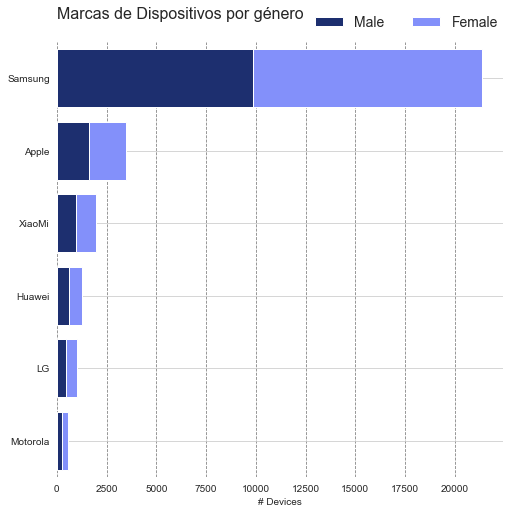

In [55]:
db_labels = df_analisis_exp[df_analisis_exp['feature_type']=='db']
db_labels = db_labels[['device_idx','feature_detail','label']]

db_labels_gender = db_labels[(db_labels['label']==2) | (db_labels['label']==3)]
db_labels_gender = db_labels_gender.groupby(['label','feature_detail']).nunique().sort_values('device_idx', ascending=False)#.head(100)
db_labels_gender2 = db_labels_gender.reset_index()
db_labels_gender2 = db_labels_gender2.pivot(index='feature_detail', columns='label', values='device_idx')
db_labels_gender2 = db_labels_gender2.sort_values(3.0, ascending=False)

df_grouped = db_labels_gender2.copy()
df_grouped = df_grouped#.head(100)
df_grouped = df_grouped.sort_values(3.0, ascending=True) 
fields = [2.0, 3.0]
colors = ['#1D2F6F', '#8390FA']
labels = ['Male','Female']
# figure and axis
fig, ax = plt.subplots(1, figsize=(8, 8))

# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Marcas de Dispositivos por género \n', loc='left', fontsize=16)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, fontsize=14)
plt.xlabel('# Devices', fontsize=10)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

*No se observan diferencias relevantes en cuanto a género y marcas de dispositivos.*

Todos los dispositivos tienen 1 sola marca.

##### url: URLS

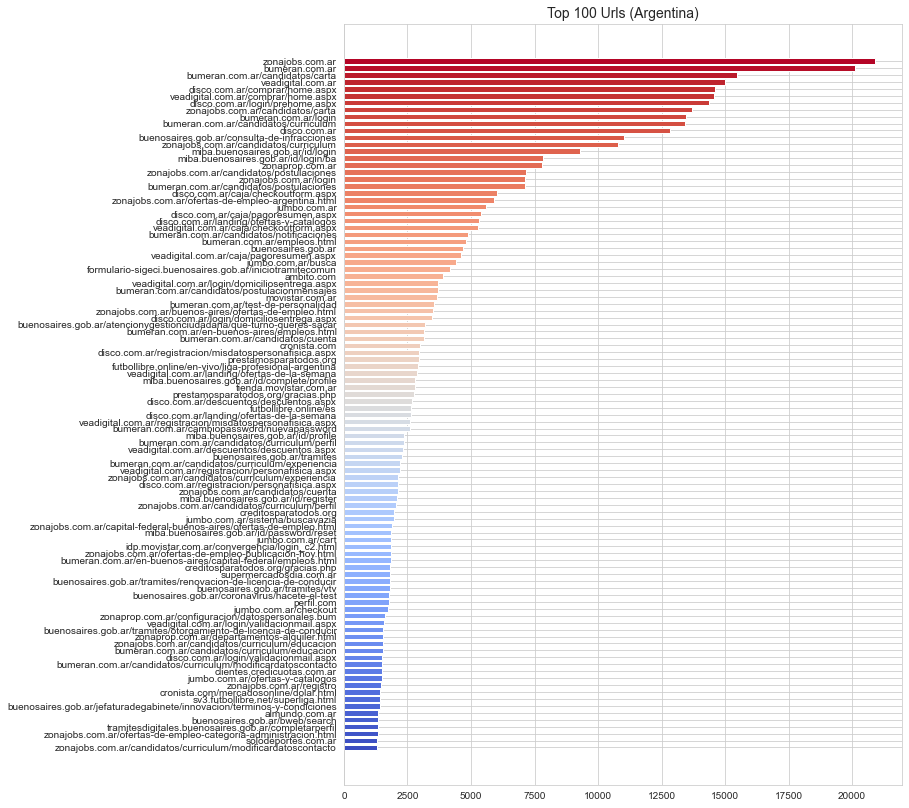

In [59]:
urls = df_analisis_exp[df_analisis_exp['feature_type']=='url']
urls = urls.sort_values('device_idx', ascending=False)
urls.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=False)

df_features_url = urls.groupby(['feature_detail']).nunique().sort_values('device_idx', ascending=False)
df_features_url = df_features_url.head(100).sort_values('device_idx', ascending=True)
df_features_url = df_features_url[['device_idx']]

# barh chart
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

fig = plt.gcf()
fig.set_size_inches(10, 14) 
sns.set_style("whitegrid")

height = df_features_url['device_idx'].to_list()
bars = df_features_url.index
y_pos = np.arange(len(bars))

plt.title("Top 100 Urls (Argentina)", fontsize=14)
# Create horizontal bars
plt.barh(y_pos, height, color=my_cmap(rescale(y_pos)))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

*Se observa que los sitios más populares tienen que ver con "bumeran.com.ar", "zonajobs.com.ar" y "veadigital", "disco". Se puede inferir entonces que la mayoría de los usuarios pueden estar interesados páginas de empleo y supermercados.*

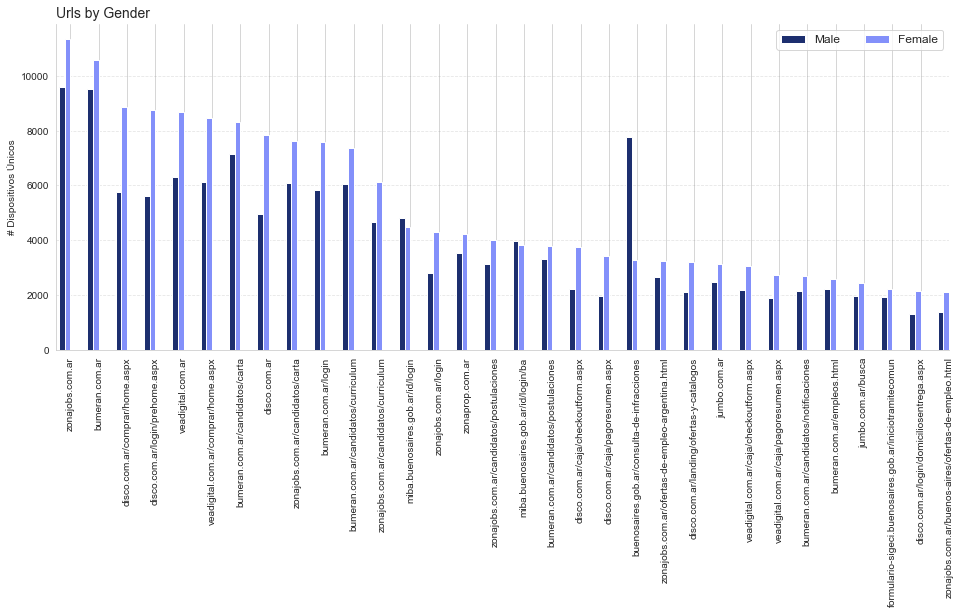

In [60]:
url_labels = df_analisis_exp[df_analisis_exp['feature_type']=='url']
url_labels = url_labels[['device_idx','feature_detail','label']]
url_labels_gender = url_labels[(url_labels['label']==2) | (url_labels['label']==3)]
url_labels_gender = url_labels_gender.groupby(['label','feature_detail']).nunique().sort_values('device_idx', ascending=False)#.head(100)
url_labels_gender.head()

url_labels_gender2 = url_labels_gender.reset_index()
url_labels_gender2 = url_labels_gender2.pivot(index='feature_detail', columns='label', values='device_idx')
url_labels_gender2 = url_labels_gender2.sort_values(3.0, ascending=False)
url_labels_gender2.head()

df_grouped = url_labels_gender2.copy()
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_grouped.index))
# plot bars
plt.bar(x - 0.3, df_grouped[2.0], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped[3.0], width = 0.2, color = '#8390FA')
# plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
# plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('# Dispositivos Únicos')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Urls by Gender', loc ='left', fontsize=14)
plt.legend(['Male', 'Female'], loc='upper right', ncol = 4, fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

*Este gráfico deja observar que las cantidades de dispositivos asignados como femeninos y masculinos no visitan de forma muy balanceada a los sitios del caso de estudio.
Por ejemplo, los sitios de búsqueda laboral son más visitados por género femenino que masculino. Lo mismo sucede con sitios de supermercados.   
En este caso sí se observan leves diferencias en cuanto a hombres y mujeres.   
Resulta interesante que la url de buenosaires.com/consulta-de-infracciones es mucho más visitada por hombres que por mujeres. Es decir, se puede inferir que accidentes o infracciones en tránsito son más habituales en el género masculino que en el femenino.   
Lo mismo pasa con sitios como cronista.com, futbol libre y ambito.com. Puede entenderse que secciones de noticias y deporte son de mayor interés masculino que femenino, en esta población* 

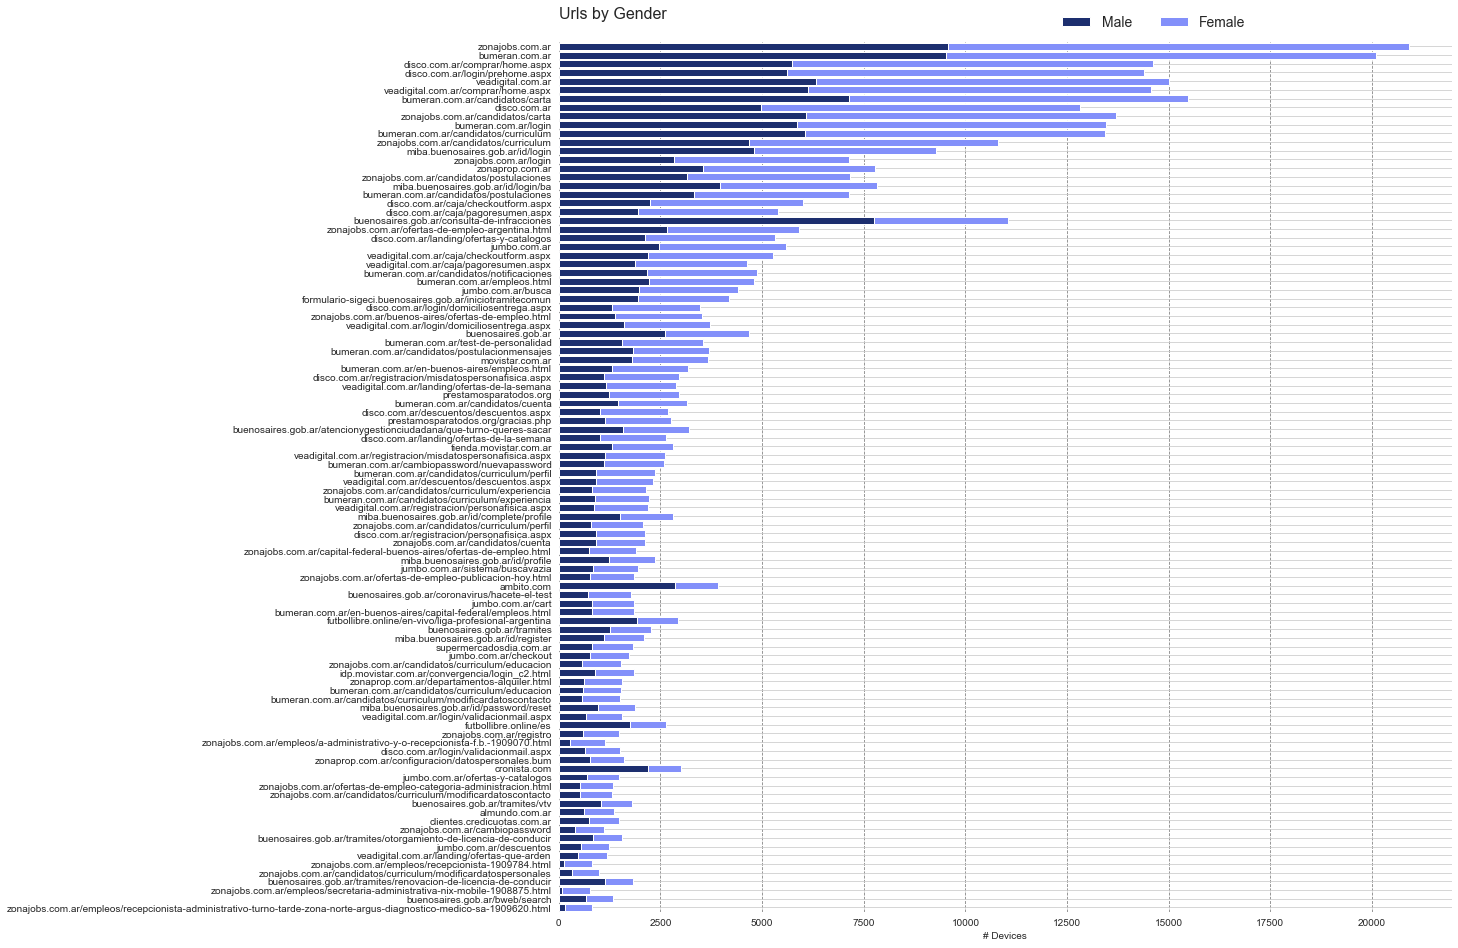

In [62]:
df_grouped = url_labels_gender2.copy()
df_grouped = df_grouped.head(100)
df_grouped = df_grouped.sort_values(3.0, ascending=True) 
fields = [2.0, 3.0]
colors = ['#1D2F6F', '#8390FA'] #, '#6EAF46', '#FAC748'
labels = ['Male','Female']
# figure and axis
fig, ax = plt.subplots(1, figsize=(16, 16))

# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Urls by Gender\n', loc='left', fontsize=16)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False, fontsize=14)
plt.xlabel('# Devices', fontsize=10)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

### Resumen Ejecutivo - Principales Insights

En cuanto a los distintos atributos:

- Los dispositivos se concentran en unos pocos Dominios
- Los dispositivos se concentran en unas pocas Urls
- Solo hay dos sistemas operativos relevantes entre los usuarios (Windows y Android)
- Hay 3 navegadores populares: Chrome es, por alta diferencia, el que más dispositivos engloba. Les sigue SocialApp y Brand_browser
- Windows 10 y Android 10 son las versiones más relevantes, por englobar mayores cantidades de dispositivos.
- Samsung es la marca más popular, seguida por Apple con muchos menos dispositivos que Samsgung.
- Samsung SM-G532M es el modelo más popular entre los dispositivos.
- Los sitios de empleo, superemercados y noticias son de los más visitados

En cuanto a proporción hombres y mujeres:

- Distribución balanceada entre ambos géneros.
- Cantidades de dispositivos asignados como femeninos y masculinos visitan de forma balanceada a los dominios. Excepciones: sitio "caras.eprfil.com" es mayormente visitado por mujeres
- Distribución balanceada en Modelos de dispositivo
- Distribución balanceada en Marcas de dispositivo
- Existe desbalance de proporcion de género en visitas de urls
- los sitios de búsqueda laboral son más visitados por género femenino (sale de URLS)
- Infracciones en tránsito son más habituales en el género masculino que en el femenino. (sale de URLS)
- Secciones de noticias y deporte son de mayor interés masculino que femenino, en esta población (sale de ULRS)


#### ANÁLISIS DE CORRESPONDENCIAS MÚLTIPLES

In [74]:
#pruebo con top 50 de urls
grouped_url_ar_50 = grouped_url_ar.groupby(["feature_detail"]).nunique().sort_values('device_idx', ascending=False).head(50)
urls_top_list = grouped_url_ar_50.index.to_list()
df_analisis_exp['url_top50']= np.where(df_analisis_exp['feature_detail'].isin(urls_top_list), 1, 0)
#pruebo con top 50 de dominios
grouped_dom_ar_50 = grouped_dom_ar.groupby(["feature_detail"]).nunique().sort_values('device_idx', ascending=False).head(50)
dom_top_list = grouped_dom_ar_50.index.to_list()
df_analisis_exp['dom_top50']= np.where(df_analisis_exp['feature_detail'].isin(dom_top_list), 1, 0)

#Matriz rala, features (columnas), device_idx (filas)
df_rala = df_analisis_exp[(df_analisis_exp['url_top50']==1)|(df_analisis_exp['dom_top50']==1)] #tuve que reducir
tmp_other_features = df_analisis_exp[(df_analisis_exp['feature_type']=='ov')|\
                                        (df_analisis_exp['feature_type']=='df')|\
                                        (df_analisis_exp['feature_type']=='bf')|\
                                        (df_analisis_exp['feature_type']=='db')|\
                                        (df_analisis_exp['feature_type']=='of')]
df_rala = pd.concat([df_rala,tmp_other_features], axis=0)
df_rala = df_rala[['device_idx', 'feature_detail']]#.pivot(columns='feature_detail', index='device_idx') #index='feature_detail', values='device_idx'
df_rala = df_rala.drop_duplicates()
df_rala

y = pd.get_dummies(df_rala.feature_detail, prefix='feature')
print(y.shape)
df_rala_final = pd.concat([df_rala,y], axis=1)
print(df_rala_final.shape)
df_rala_final.head()

#pego valores de label GENERO
df_label_features = df_analisis_exp[['label','device_idx']]
df_label_features = df_label_features[(df_label_features['label']==2)|(df_label_features['label']==3)]
df_label_features = df_label_features.drop_duplicates()

df_rala_final = pd.merge(df_rala_final, df_label_features, how='left', on='device_idx')
print(df_rala_final.shape)
df_rala_final.dropna(inplace=True)
df_rala_final

(846843, 163)
(846843, 165)
(846843, 166)


,device_idx,feature_detail,feature_0221.com.ar,feature_Android,feature_Android 10,feature_Android 4,feature_Android 5,feature_Android 6,feature_Android 7,feature_Android 8,...,feature_ypf.com,feature_zonajobs.com.ar,feature_zonajobs.com.ar/buenos-aires/ofertas-de-empleo.html,feature_zonajobs.com.ar/candidatos/carta,feature_zonajobs.com.ar/candidatos/curriculum,feature_zonajobs.com.ar/candidatos/postulaciones,feature_zonajobs.com.ar/login,feature_zonajobs.com.ar/ofertas-de-empleo-argentina.html,feature_zonaprop.com.ar,label
0,392.0,bumeran.com.ar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,930.0,zonajobs.com.ar,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.0
2,930.0,zonajobs.com.ar/candidatos/curriculum,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.0
3,930.0,zonajobs.com.ar/ofertas-de-empleo-argentina.html,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.0
4,1145.0,bumeran.com.ar/login,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846838,101820.0,XiaoMi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
846839,101862.0,Samsung,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
846840,101862.0,SocialApp,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
846841,101862.0,Android,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [75]:
from sklearn.preprocessing import StandardScaler
import prince
import mca

               0         1
0       0.246482  0.125988
1       0.447699 -0.191525
2      -0.640111  0.156124
3      -1.336724  0.307060
4       1.184712 -0.068152
...          ...       ...
846838  0.833732 -4.558482
846839  0.383521  0.039094
846840  0.691594  0.236759
846841  0.437895 -0.124642
846842 -0.517465 -0.623696

[846843 rows x 2 columns]


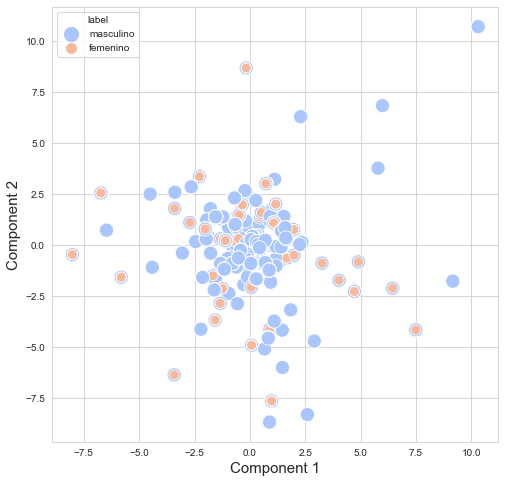

In [76]:
X = df_rala_final.copy()
features = df_rala_final.columns[2:-1]
X = X[features]
mca = prince.MCA()
mca = mca.fit(X) # same as calling ca.fs_r(1)
mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)

finalDf = pd.concat([mca, df_rala_final[['label']]], axis = 1)
finalDf['label'] = np.where(finalDf['label']==3, 'femenino', 'masculino')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
sns.scatterplot(data=finalDf, x=0, y=1, hue="label", size="label", palette='coolwarm'
               ,sizes=(100, 200),legend="full")#,sizes=(20, 200), legend="full"

*Ambos géneros se concentran en un área central. Sin embargo, hay unos pocos puntos alejados.*

#### LOCAL OUTLIER FACTOR

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [78]:
# MCA
X = df_rala_final.copy()
features = df_rala_final.columns[2:-1]
X = X[features]
mca = prince.MCA()
mca = mca.fit(X) # same as calling ca.fs_r(1)
mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)

finalDf = pd.concat([mca, df_rala_final[['label']]], axis = 1)
finalDf['label'] = np.where(finalDf['label']==3, 'femenino', 'masculino')
print(finalDf.head())

print(finalDf[0].min())
print(finalDf[1].min())
print(finalDf[0].max())
print(finalDf[1].max())

               0         1
0       0.107753 -0.362593
1      -0.793841 -0.785027
2      -0.948964 -1.126429
3      -0.075794  0.982616
4       0.132299  0.473603
...          ...       ...
846838 -0.157400  0.751203
846839 -0.394555  0.050728
846840  0.756481 -0.396727
846841  0.289787  0.196833
846842 -0.548225  0.732029

[846843 rows x 2 columns]


,0,1,label
0,0.107753,-0.362593,masculino
1,-0.793841,-0.785027,masculino
2,-0.948964,-1.126429,masculino
3,-0.075794,0.982616,masculino
4,0.132299,0.473603,masculino


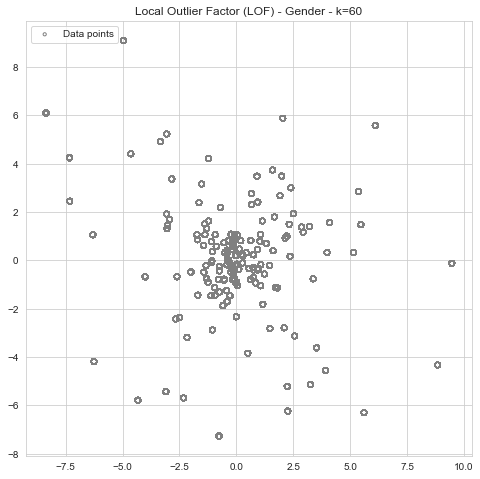

In [86]:
data = finalDf.copy()
fig = plt.figure(figsize = (8,8))
a = list(data[0])
x= np.array(a)
b = list(data[1])
y= np.array(b)
z=np.array([a,b])
X=z.T
#PARA ESTE CASO, ENCONTRARE QUIZAS OUTLIERS INDICANDO GRAN CANTIDAD DE VECINOS
#con más de 100 vecinos, rompe por falta de memoria
clf = LocalOutlierFactor(n_neighbors=60, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
round_off_values = np.around(X_scores, decimals =2)
new =round_off_values*(-1)
plt.title("Local Outlier Factor (LOF) - Gender - k=60") #contar lo que hice y lo que encontré
plt.scatter(a,b, edgecolor='grey', s=30, label='Data points',facecolors='none')
for x_pos, y_pos, label in zip(x,y,new):
    if label>1.5:
        plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10,5),     
                textcoords='offset points', 
                ha='right',         
                va='center',fontsize=5.5,color='r')
plt.axis('tight')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
plt.show()

#### VIF - EN FALTA